# Exponential Growth to test numerical schemes

Staring with an ODE of exponential growth to test the accuracy and robustness of our numerical schemes before applying them to more complex problems.

$$
\frac{dx}{dt} = ax
$$

$$
x = e^{at}
$$


In [48]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
from IPython.core.display import HTML
HTML( open('my_css.css').read() )

In [49]:
##Define the equations as functions for use in the program

def func_ddt(q,a):
    return a*q

In [50]:
# dqdt is a list of the stored time derivatives for q, stored in order from present to the past
#ie. f(q_n) = dqdt[0] ; f(q_n-1) = dqdt[1] ;...

#phi_... = q, delta t = dt, f(...) = dqdt[...]

#q is either x or v

###Euler Forwards
def euler1(q,dt,func,a):
    return q + dt*func(q,a)

###Forwards-Backwards
def forback(q,dt,func,a): 
    return q + dt*func(q+dt*func(q,a),a)
    
###Leapfrog
#Since leapfrog uses q_(n-1), we need to use a different scheme for the first time step as there is no q_(n-1)
#In this case we use the Euler Forwards scheme    
def leapfrogVar(qold,qmid,dtmid,dtold,func,a):
    l1 = (dtmid**2)*qold
    l2 = qmid*(dtmid**2 - dtold**2)
    l3 = (dtmid*dtold*(dtmid+dtold))
    l4 = 1/(dtold**2)
    return l4*(l1 - l2 + l3*func(qmid,a))

def leapfrogCon(qold,qmid,dt,func,a):
    return qold + 2*dt*func(qmid,a)


###Runge-Kutta
def RK(dt,q,func,a): 
    s1 = dt*func(q,a)
    s2 = dt*func(q+s1/2,a)
    s3 = dt*func(q+s2/2,a)
    s4 = dt*func(q+s3,a)
    #print(s1,s2,s3,s4)
    return np.array(q + (s1 + 2*s2 + 2*s3 + s4)/6)

In [51]:
#Euler Forwards Time Stepper - Variable Stepping
def onestepVar(x,dt,dtStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr = np.zeros(noStep+1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xArr[stepNo] = euler1(xArr[stepNo-1],dt,func_ddt,a)
        t += dt
        dt = dt*dtStep
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr,dt

#Euler Forwards Time Stepper - Constant Stepping
def onestepCon(x,tStop,tStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr = np.zeros(noStep+1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xArr[stepNo] = euler1(xArr[stepNo-1],tStep,func_ddt,a)
        t += tStep    
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr

#Forwards-Backwards time stepper - Variable Stepping
def twostepVar(x,dt,dtStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr = np.zeros(noStep+1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xArr[stepNo] = forback(xArr[stepNo-1],dt,func_ddt,a)
        t += dt   
        dt = dt*dtStep
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr,dt

#Forwards-Backwards time stepper - Constant Stepping
def twostepCon(x,tStop,tStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr = np.zeros(noStep +1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xArr[stepNo] = forback(xArr[stepNo-1],tStep,func_ddt,a)
        t += tStep    
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr
    
    
#Leapfrog time stepper - Variable Stepping
def threestepVar(x,dt,dtStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr = np.zeros(noStep +1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    dtprev = 0
    
    for stepNo in range(1,noStep+1):
        if stepNo >= 2:
            xArr[stepNo] = leapfrogVar(xArr[stepNo-2],xArr[stepNo-1],dt,dtprev,func_ddt,a)
        else:
            xArr[stepNo] = euler1(xArr[stepNo-1],dt,func_ddt,a)
        t += dt  
        dtprev = dt
        dt = dt*dtStep
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr,dt

#Leapfrog time stepper - Constant Stepper
def threestepCon(x,tStop,tStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr = np.zeros(noStep +1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1): #[stepNo] = n+1, [stepNo-1] = xvArr = n, [stepNo-2] = n-1
        if stepNo >= 2:
            xArr[stepNo] = leapfrogCon(xArr[stepNo-2],xArr[stepNo-1],tStep,func_ddt,a)
        else:
            xArr[stepNo] = euler1(xArr[stepNo-1],tStep,func_ddt,a)
        t += tStep    
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr
    
#Runge-Kutta (4-Step) time stepper - Variable Stepping
def fourstepVar(x,dt,dtStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr = np.zeros(noStep +1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xArr[stepNo] = RK(dt,xArr[stepNo-1],func_ddt,a)
        t += dt  
        dt = dt*dtStep
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr,dt

#Runge-Kutta (4-Step) time stepper - Constant Stepping
def fourstepCon(x,tStop,tStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr = np.zeros(noStep +1)
    tArr[0],xArr[0] = t,x
    AccxArr[0] = x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xArr[stepNo] = RK(tStep,xArr[stepNo-1],func_ddt,a)
        t += tStep  
        tArr[stepNo] = t
        AccxArr[stepNo] = math.exp(a*t)
    return xArr,tArr,AccxArr

def highres(x,tStop,tStep,noStep,a,t=0):
    tArr,xArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0] = t,x
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        t += tStep 
        xArr[stepNo] = math.exp(a*t)
        tArr[stepNo] = t
    return xArr,tArr

# Start Here for Experiments

In [164]:
#define stuff
scheme = 1
mode = 'var'
nsteps = 100
timestop = 2*math.pi
maxtimestep = 0.5
initialtimestep = 0.14618333052097     #From spreadsheet
initialX = 1.0
alpha = 1.0
timestep = timestop/nsteps
timestepstep = 1.01395947979003  #From spreadsheet
if mode == 'var':
    print("The time step multiplier is",timestepstep)
elif mode == 'con':
    print("The time step is",timestep)
elif scheme == 'HR':
    print("The time step for the high resolution run is",timestep)

The time step multiplier is 1.01395947979003


In [165]:
if scheme == 1:
    if mode == 'var':
        VplotX3,VplotT3,VplotAX3,VplotDTF3 = onestepVar(initialX,initialtimestep,timestepstep,nsteps,alpha)
    elif mode == 'con':
        CplotX,CplotT,CplotAX = onestepCon(initialX,timestop,timestep,nsteps,alpha)
    schemename = "Euler Forwards"
elif scheme == 2:
    if mode == 'var':
        VplotX,VplotT,VplotAX,VplotDTF = twostepVar(initialX,initialtimestep,timestepstep,nsteps,alpha)
    elif mode == 'con':
        CplotX,CplotT,CplotAX = twostepCon(initialX,timestop,timestep,nsteps,alpha)
    schemename = "Forwards Backwards"
elif scheme == 3:
    if mode == 'var':
        VplotX,VplotT,VplotAX,VplotDTF = threestepVar(initialX,initialtimestep,timestepstep,nsteps,alpha)
    elif mode == 'con':
        CplotX,CplotT,CplotAX = threestepCon(initialX,timestop,timestep,nsteps,alpha)
    schemename = "Leapfrog"
elif scheme == 4:
    if mode == 'var':
        VplotX5,VplotT5,VplotAX5,VplotDTF5 = fourstepVar(initialX,initialtimestep,timestepstep,nsteps,alpha)
    elif mode == 'con':
        CplotX,CplotT,CplotAX = fourstepCon(initialX,timestop,timestep,nsteps,alpha)
    schemename = "Runge-Kutta (4-Step)"
elif scheme == 'HR':
    HplotX,HplotT = highres(initialX,timestop,timestep,nsteps,alpha)
#print("No. Steps taken was",len(plotX)-1,"steps")
#print("The total time forecast was :",plotT[-1])
#print("The total number of revolutions was:",plotT[-1]/(2*math.pi))
#print("The final time step was:",plotDT[-1])

In [166]:
#Verror1 = [abs(b-a) for a,b in zip(VplotX,VplotAX)]
#Cerror1 = [abs(b-a) for a,b in zip(CplotX,CplotAX)]
##print (len(error), len(plotT))    
#figE, axesE = plt.subplots(nrows=2,ncols=1,figsize=(18,12)) 
#axesE[0].semilogy(HplotT,HplotX,'k-')
#axesE[0].semilogy(CplotT,CplotX,'b.-',label='Con')
#axesE[0].semilogy(VplotT,VplotX,'r.-',label='Var')
#axesE[0].set_title('Value of X ('+schemename+' Con dt = '+"%.4f" % timestep+', Var dt final = '+"%.4f" % VplotDTF+')')
#axesE[0].set_xlim(0,timestop)
#axesE[0].legend(loc=3)
#axesE[1].semilogy(CplotT,Cerror,'b.-',label='Con')
#axesE[1].semilogy(VplotT,Verror,'r.-',label='Var')
#axesE[1].set_title('Error ('+schemename+' Con dt = '+"%.4f" % timestep+', Var dt final = '+"%.4f" % VplotDTF+')')
#axesE[1].grid()
#axesE[1].set_xlim(0,timestop)
#axesE[1].legend(loc=2)
#figE.tight_layout()
#if scheme == 1:
#    figE.savefig('Exp - EF - V2.png')
#elif scheme == 2:
#    figE.savefig('Exp - FB - V2.png')
#elif scheme == 3:
#    figE.savefig('Exp - LF - V2.png')
#elif scheme == 4:
#    figE.savefig('Exp - RK - V2.png')

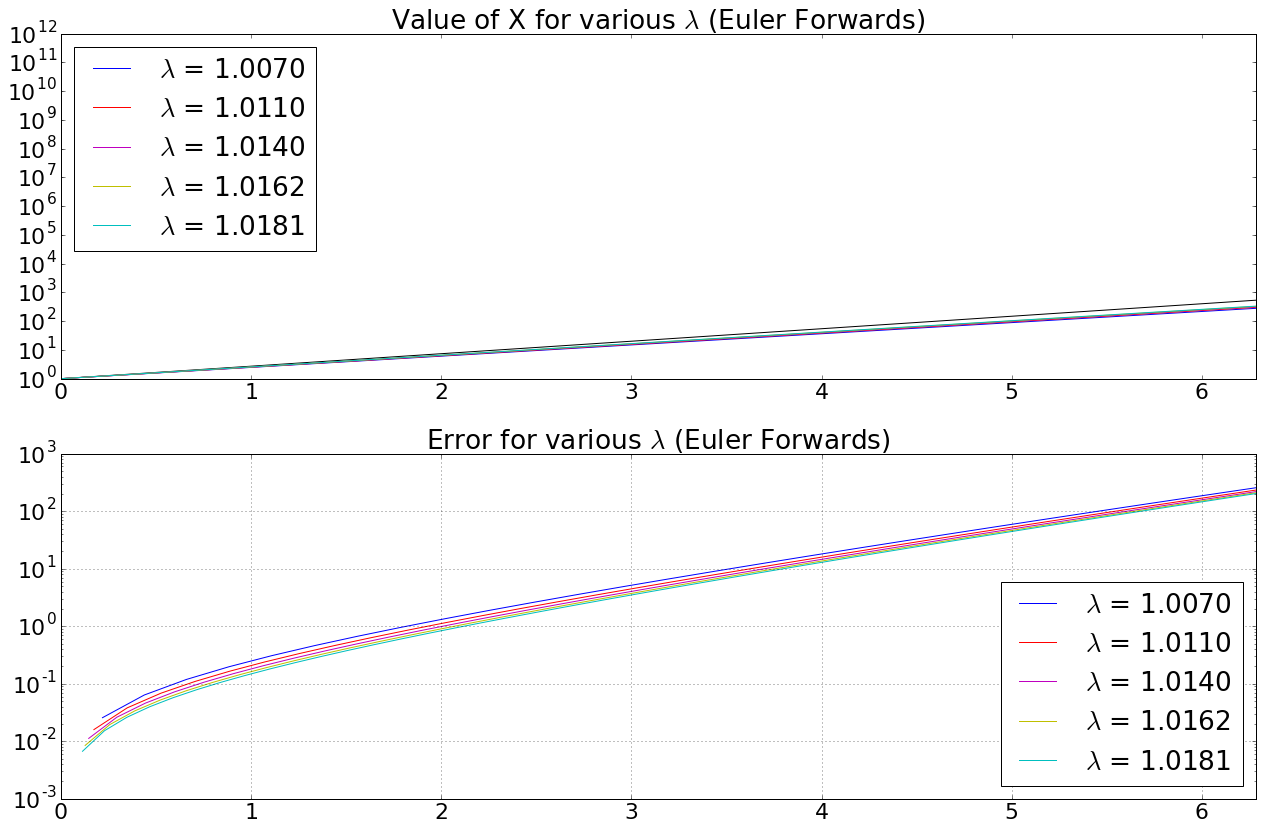

In [167]:
Verror1 = [abs(b-a) for a,b in zip(VplotX1,VplotAX1)]
Verror2 = [abs(b-a) for a,b in zip(VplotX2,VplotAX2)]
Verror3 = [abs(b-a) for a,b in zip(VplotX3,VplotAX3)]
Verror4 = [abs(b-a) for a,b in zip(VplotX4,VplotAX4)]
Verror5 = [abs(b-a) for a,b in zip(VplotX5,VplotAX5)]
#print (len(error), len(plotT))    
figE, axesE = plt.subplots(nrows=2,ncols=1,figsize=(18,12)) 
axesE[0].semilogy(HplotT,HplotX,'k-')
axesE[0].semilogy(VplotT1,VplotX1,'b-',label='$\lambda$ = 1.0070')
axesE[0].semilogy(VplotT2,VplotX2,'r-',label='$\lambda$ = 1.0110')
axesE[0].semilogy(VplotT3,VplotX3,'m-',label='$\lambda$ = 1.0140')
axesE[0].semilogy(VplotT4,VplotX4,'y-',label='$\lambda$ = 1.0162')
axesE[0].semilogy(VplotT5,VplotX5,'c-',label='$\lambda$ = 1.0181')
axesE[0].set_title('Value of X for various $\lambda$ ('+schemename+')')
axesE[0].set_xlim(0,timestop)
axesE[0].legend(loc=2)
axesE[1].semilogy(VplotT1,Verror1,'b-',label='$\lambda$ = 1.0070')
axesE[1].semilogy(VplotT2,Verror2,'r-',label='$\lambda$ = 1.0110')
axesE[1].semilogy(VplotT3,Verror3,'m-',label='$\lambda$ = 1.0140')
axesE[1].semilogy(VplotT4,Verror4,'y-',label='$\lambda$ = 1.0162')
axesE[1].semilogy(VplotT5,Verror5,'c-',label='$\lambda$ = 1.0181')
axesE[1].set_title('Error for various $\lambda$ ('+schemename+')')
axesE[1].grid()
axesE[1].set_xlim(0,timestop)
axesE[1].set_ylim(0.001,1000)
axesE[1].legend(ncol=1,loc=4)
figE.tight_layout()
if scheme == 1:
    figE.savefig('Exp - EF - V3.png')
elif scheme == 2:
    figE.savefig('Exp - FB - V3.png')
elif scheme == 3:
    figE.savefig('Exp - LF - V3.png')
elif scheme == 4:
    figE.savefig('Exp - RK - V3.png')